In [1]:
import requests
import pandas as pd
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [ ]:
# Download the XLSX file from the website
url = 'https://raw.githubusercontent.com/ziyuw2/20.440_project/master/Data/41467_2021_25213_MOESM19_ESM.xlsx'
response = requests.get(url)
with open('source.xlsx', 'wb') as f:
    f.write(response.content)

# Read the Excel file into a Pandas DataFrame
source_exl = pd.read_excel('source.xlsx', sheet_name=None, engine='openpyxl')

In [ ]:
# Loop over each sheet in the Excel file to save each sheet into a dict file
csv_dict = {}
for sheet_name, content in source_exl.items():
    # Save the sheet data as a CSV file
    clean_sheet_name = sheet_name.replace("Fig", "").replace(".", "").replace(" ", "").replace(",", "_")
    print(clean_sheet_name)
    content.to_csv(f'{sheet_name}.csv', index=False)
    df = pd.read_csv(f'{sheet_name}.csv')
    csv_dict[clean_sheet_name] = df

1a
1b
1c
1d
1e
1f
1g
2a
2b
2c
2d
2e
2f
3a
3b
3c
3d
3e
4a
4b
4c
4d_e
5a_c
5b
5d
5e
6


In [ ]:
csv_dict['1e']

,Unnamed: 0,Sample,Feature,Rank,Gradient,Direction,Order
0,1,HV001,Bifidobacterium longum,520,NL,R<U<N,579
1,2,HV002,Bifidobacterium longum,445,NL,R<U<N,634
2,3,HV003,Bifidobacterium longum,723,NL,R<U<N,639
3,4,HV004,Bifidobacterium longum,314,NL,R<U<N,418
4,5,HV005,Bifidobacterium longum,231,NL,R<U<N,575
...,...,...,...,...,...,...,...
6283,6284,TZFG316,Bacteroides dorei,0,R,R<U<N,573
6284,6285,TZFG317,Bacteroides dorei,0,R,R<U<N,728
6285,6286,TZFG318,Bacteroides dorei,660,U,R<U<N,278
6286,6287,TZFG319,Bacteroides dorei,0,R,R<U<N,262


In [ ]:
csv_dict['1a']

,PID,Gender,Age
0,TZFG001,Male,35.561944
1,TZFG002,Male,27.770021
2,TZFG003,Female,35.230664
3,TZFG004,Female,28.544832
4,TZFG005,Male,24.087611
...,...,...,...
318,TZFG320,Male,50.028747
319,TZFGP01,Female,36.000000
320,TZFGP02,Female,35.000000
321,TZFGP03,Male,40.000000


In [ ]:
csv_dict['1c']

,Sample,Cohort,Gender,Age,Reads,Markers,Genes,Cluster,Residency,Label,Log10Markers,MDS1,MDS2,TSNE1,TSNE2
0,HV001,NL,Male,27.000000,8135158.0,211643.0,263494.0,NaN,NaN,NL,"(4.95,5.33]",-0.042320,-0.086724,15.226276,-0.137869
1,HV002,NL,Male,26.000000,9051284.0,507239.0,201067.0,NaN,NaN,NL,"(5.7,6.08]",-0.099365,-0.041610,-7.668209,1.800409
2,HV003,NL,Female,24.000000,9281854.0,450897.0,206529.0,NaN,NaN,NL,"(5.33,5.7]",-0.228056,0.100322,-8.331373,12.369550
3,HV004,NL,Female,20.000000,13014979.0,652248.0,200244.0,NaN,NaN,NL,"(5.7,6.08]",-0.120803,0.054894,-8.406149,2.306940
4,HV005,NL,Female,22.000000,10015416.0,342633.0,214428.0,NaN,NaN,NL,"(5.33,5.7]",0.136042,-0.067075,7.515303,-10.286087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,TZFG316,TZ,Male,32.027379,NaN,NaN,NaN,2.0,Rural,TZ Rural,NaN,0.232198,-0.041192,4.344584,-17.062052
782,TZFG317,TZ,Male,46.428474,NaN,NaN,NaN,3.0,Rural,TZ Rural,NaN,0.273511,0.158296,-6.165774,-14.041771
783,TZFG318,TZ,Male,37.067762,NaN,NaN,NaN,3.0,Urban,TZ Urban,NaN,0.255344,0.190366,-10.646050,-14.090726
784,TZFG319,TZ,Male,36.969199,NaN,NaN,NaN,2.0,Rural,TZ Rural,NaN,0.116084,-0.105838,10.381762,-9.645968


In [ ]:
temp_df = csv_dict['1c'].copy()
temp_df.rename(columns={'Sample': 'PID'}, inplace=True)
display(temp_df)

,PID,Cohort,Gender,Age,Reads,Markers,Genes,Cluster,Residency,Label,Log10Markers,MDS1,MDS2,TSNE1,TSNE2
0,HV001,NL,Male,27.000000,8135158.0,211643.0,263494.0,NaN,NaN,NL,"(4.95,5.33]",-0.042320,-0.086724,15.226276,-0.137869
1,HV002,NL,Male,26.000000,9051284.0,507239.0,201067.0,NaN,NaN,NL,"(5.7,6.08]",-0.099365,-0.041610,-7.668209,1.800409
2,HV003,NL,Female,24.000000,9281854.0,450897.0,206529.0,NaN,NaN,NL,"(5.33,5.7]",-0.228056,0.100322,-8.331373,12.369550
3,HV004,NL,Female,20.000000,13014979.0,652248.0,200244.0,NaN,NaN,NL,"(5.7,6.08]",-0.120803,0.054894,-8.406149,2.306940
4,HV005,NL,Female,22.000000,10015416.0,342633.0,214428.0,NaN,NaN,NL,"(5.33,5.7]",0.136042,-0.067075,7.515303,-10.286087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,TZFG316,TZ,Male,32.027379,NaN,NaN,NaN,2.0,Rural,TZ Rural,NaN,0.232198,-0.041192,4.344584,-17.062052
782,TZFG317,TZ,Male,46.428474,NaN,NaN,NaN,3.0,Rural,TZ Rural,NaN,0.273511,0.158296,-6.165774,-14.041771
783,TZFG318,TZ,Male,37.067762,NaN,NaN,NaN,3.0,Urban,TZ Urban,NaN,0.255344,0.190366,-10.646050,-14.090726
784,TZFG319,TZ,Male,36.969199,NaN,NaN,NaN,2.0,Rural,TZ Rural,NaN,0.116084,-0.105838,10.381762,-9.645968


In [ ]:
species_hostinfo = pd.DataFrame({'PID': csv_dict['1e']['Sample'], 
                                 'Bacteria': csv_dict['1e']['Feature'], 
                                 'Abundance': csv_dict['1e']['Rank']})

In [ ]:
species_hostinfo = species_hostinfo.merge(temp_df[['Age','PID', 'Gender', 'Label']], on='PID', how='left')

In [ ]:
display(species_hostinfo)

,PID,Bacteria,Abundance,Age,Gender,Label
0,HV001,Bifidobacterium longum,520,27.000000,Male,NL
1,HV002,Bifidobacterium longum,445,26.000000,Male,NL
2,HV003,Bifidobacterium longum,723,24.000000,Female,NL
3,HV004,Bifidobacterium longum,314,20.000000,Female,NL
4,HV005,Bifidobacterium longum,231,22.000000,Female,NL
...,...,...,...,...,...,...
6283,TZFG316,Bacteroides dorei,0,32.027379,Male,TZ Rural
6284,TZFG317,Bacteroides dorei,0,46.428474,Male,TZ Rural
6285,TZFG318,Bacteroides dorei,660,37.067762,Male,TZ Urban
6286,TZFG319,Bacteroides dorei,0,36.969199,Male,TZ Rural


In [ ]:
blongum_hostinfo = species_hostinfo[species_hostinfo['Bacteria'] == 'Bifidobacterium longum']
amuciniphila_hostinfo = species_hostinfo[species_hostinfo['Bacteria'] == 'Akkermansia muciniphila']
ou_hostinfo = species_hostinfo[species_hostinfo['Bacteria'] == 'Oscillibacter uncl.']
af_hostinfo = species_hostinfo[species_hostinfo['Bacteria'] == 'Alistipes finegoldii']
pc_hostinfo = species_hostinfo[species_hostinfo['Bacteria'] == 'Prevotella copri']
su_hostinfo = species_hostinfo[species_hostinfo['Bacteria'] == 'Subdoligranulum uncl.']
eb_hostinfo = species_hostinfo[species_hostinfo['Bacteria'] == 'Eubacterium biforme']
bd_hostinfo = species_hostinfo[species_hostinfo['Bacteria'] == 'Bacteroides dorei']

In [ ]:
display(blongum_hostinfo)

,PID,Bacteria,Abundance,Age,Gender,Label
0,HV001,Bifidobacterium longum,520,27.000000,Male,NL
1,HV002,Bifidobacterium longum,445,26.000000,Male,NL
2,HV003,Bifidobacterium longum,723,24.000000,Female,NL
3,HV004,Bifidobacterium longum,314,20.000000,Female,NL
4,HV005,Bifidobacterium longum,231,22.000000,Female,NL
...,...,...,...,...,...,...
781,TZFG316,Bifidobacterium longum,0,32.027379,Male,TZ Rural
782,TZFG317,Bifidobacterium longum,0,46.428474,Male,TZ Rural
783,TZFG318,Bifidobacterium longum,0,37.067762,Male,TZ Urban
784,TZFG319,Bifidobacterium longum,0,36.969199,Male,TZ Rural


In [ ]:
blongum_nl = blongum_hostinfo[blongum_hostinfo['Label'] == 'NL '].sort_values(by='Abundance', ascending=True).reset_index(drop=True)
blongum_rr = blongum_hostinfo[blongum_hostinfo['Label'] == 'TZ Rural'].sort_values(by='Abundance', ascending=True).reset_index(drop=True)
blongum_ub = blongum_hostinfo[blongum_hostinfo['Label'] == 'TZ Urban'].sort_values(by='Abundance', ascending=True).reset_index(drop=True)

In [ ]:
blongum_sorted = blongum_hostinfo.sort_values(by='Abundance', ascending=True).reset_index(drop=True)
# print(blongum_nl['Abundance'].rank(ascending=True))

In [ ]:
display(blongum_nl)

,PID,Bacteria,Abundance,Age,Gender,Label
0,HV063,Bifidobacterium longum,0,23.0,Male,NL
1,HV347,Bifidobacterium longum,0,21.0,Female,NL
2,HV030,Bifidobacterium longum,0,25.0,Female,NL
3,HV416,Bifidobacterium longum,0,26.0,Male,NL
4,HV129,Bifidobacterium longum,0,26.0,Male,NL
...,...,...,...,...,...,...
466,HV226,Bifidobacterium longum,780,24.0,Male,NL
467,HV309,Bifidobacterium longum,781,48.0,Male,NL
468,HV470,Bifidobacterium longum,782,22.0,Male,NL
469,HV455,Bifidobacterium longum,783,26.0,Female,NL


In [ ]:
(np.arange(len(blongum_nl))+1)/len(blongum_nl)

In [ ]:
blongum_nl['Abundance']

0      520
1      445
2      723
3      314
4      231
      ... 
466    305
467    138
468    472
469    505
470    510
Name: Abundance, Length: 471, dtype: int64

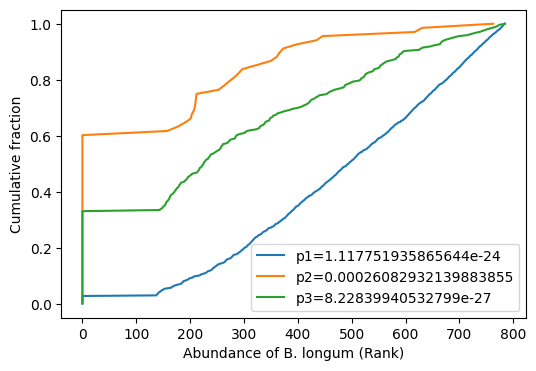

In [ ]:
p1 = sp.stats.ks_2samp(blongum_nl['Abundance'], blongum_rr['Abundance'], alternative='two-sided', method='auto')
p2 = sp.stats.ks_2samp(blongum_ub['Abundance'], blongum_rr['Abundance'], alternative='two-sided', method='auto')
p3 = sp.stats.ks_2samp(blongum_ub['Abundance'], blongum_nl['Abundance'], alternative='two-sided', method='auto')
fig = plt.figure(figsize=(6,4))
plt.plot(blongum_nl['Abundance'], (np.arange(len(blongum_nl))+1)/len(blongum_nl), label=f'p1={p1.pvalue}')
plt.plot(blongum_rr['Abundance'], (np.arange(len(blongum_rr))+1)/len(blongum_rr), label =f'p2={p2.pvalue}')
plt.plot(blongum_ub['Abundance'], (np.arange(len(blongum_ub))+1)/len(blongum_ub), label=f'p3={p3.pvalue}')
plt.legend()
plt.xlabel('Abundance of B. longum (Rank)')
plt.ylabel('Cumulative fraction')
# plt.title('Gut B. longum Abundance in Different Populations')
fig.savefig('blongum_abundance_populations.png')

In [ ]:
p1 = sp.stats.ks_2samp(blongum_nl['Abundance'], blongum_rr['Abundance'], alternative='two-sided', method='auto')
p2 = sp.stats.ks_2samp(blongum_ub['Abundance'], blongum_rr['Abundance'], alternative='two-sided', method='auto')
p3 = sp.stats.ks_2samp(blongum_ub['Abundance'], blongum_nl['Abundance'], alternative='two-sided', method='auto')

In [ ]:
p2.pvalue

0.00026082932139883855

In [ ]:
p1
p3

KstestResult(statistic=0.42489491735217516, pvalue=8.22839940532799e-27, statistic_location=287, statistic_sign=1)

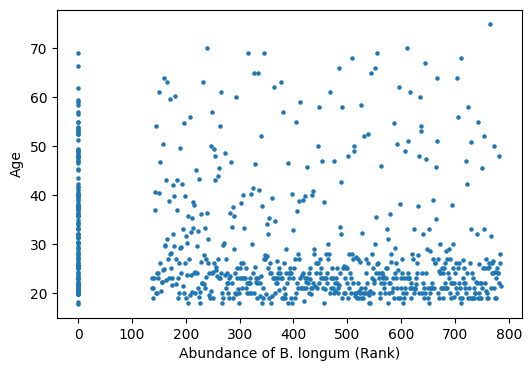

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.scatter(blongum_hostinfo['Abundance'], blongum_hostinfo['Age'], s=5)
plt.xlabel('Abundance of B. longum (Rank)')
plt.ylabel('Age')
# plt.title('Gut B. longum Abundance in Different Age Groups')
fig.savefig('blongum_abundance_age.png')

Text(0, 0.5, 'Abundance of A. muciniphila (Rank)')

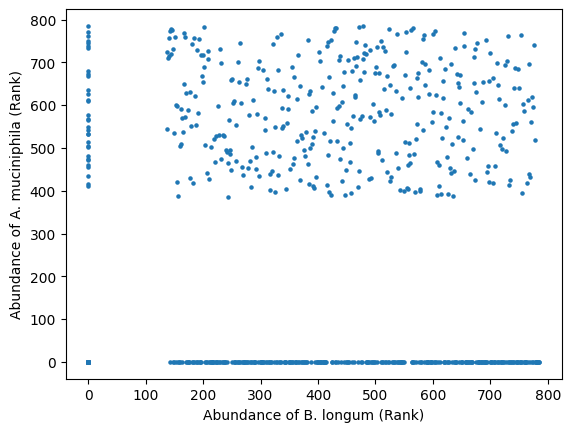

In [ ]:
plt.scatter(blongum_hostinfo['Abundance'], amuciniphila_hostinfo['Abundance'], s=5)
plt.xlabel('Abundance of B. longum (Rank)')
plt.ylabel('Abundance of A. muciniphila (Rank)')
# plt.title('Gut B. longum Abundance in Different Age Groups')

Text(0, 0.5, 'Abundance of P. copri (Rank)')

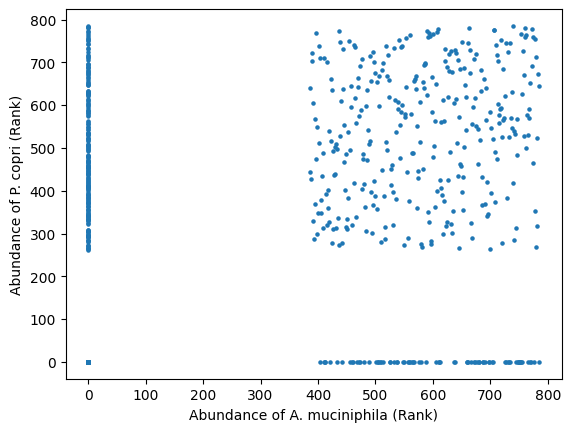

In [ ]:
plt.scatter(amuciniphila_hostinfo['Abundance'], af_hostinfo['Abundance'], s=5)
plt.xlabel('Abundance of A. muciniphila (Rank)')
plt.ylabel('Abundance of P. copri (Rank)')

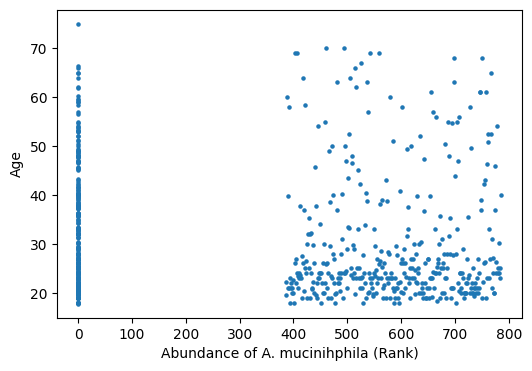

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.scatter(amuciniphila_hostinfo['Abundance'], amuciniphila_hostinfo['Age'], s=5)
plt.xlabel('Abundance of A. mucinihphila (Rank)')
plt.ylabel('Age')
# plt.title('Gut A. muciniphila Abundance in Different Age Groups')
fig.savefig('amucinihphila_abundance_age.png')

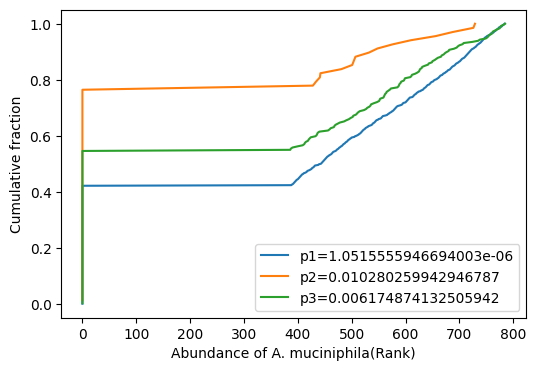

In [ ]:
amu_nl = amuciniphila_hostinfo[amuciniphila_hostinfo['Label'] == 'NL '].sort_values(by='Abundance', ascending=True).reset_index(drop=True)
amu_rr = amuciniphila_hostinfo[amuciniphila_hostinfo['Label'] == 'TZ Rural'].sort_values(by='Abundance', ascending=True).reset_index(drop=True)
amu_ub = amuciniphila_hostinfo[amuciniphila_hostinfo['Label'] == 'TZ Urban'].sort_values(by='Abundance', ascending=True).reset_index(drop=True)
fig = plt.figure(figsize=(6,4))
p1 = sp.stats.ks_2samp(amu_nl['Abundance'], amu_rr['Abundance'], alternative='two-sided', method='auto')
p2 = sp.stats.ks_2samp(amu_ub['Abundance'], amu_rr['Abundance'], alternative='two-sided', method='auto')
p3 = sp.stats.ks_2samp(amu_ub['Abundance'], amu_nl['Abundance'], alternative='two-sided', method='auto')
plt.plot(amu_nl['Abundance'], (np.arange(len(amu_nl))+1)/len(amu_nl), label=f'p1={p1.pvalue}')
plt.plot(amu_rr['Abundance'], (np.arange(len(amu_rr))+1)/len(amu_rr), label =f'p2={p2.pvalue}')
plt.plot(amu_ub['Abundance'], (np.arange(len(amu_ub))+1)/len(amu_ub), label=f'p3={p3.pvalue}')
plt.legend()
plt.xlabel('Abundance of A. muciniphila(Rank)')
plt.ylabel('Cumulative fraction')
# plt.title('Gut A. muciniphila Abundance in Different Populations')
fig.savefig('amuciniphila_abundance_populations.png')

In [ ]:
# r_tz = robjects.r.load("data.TZ.Robj")
# tz_dict = dict(zip(r_tz.names, map(list, list(r_tz.values()))))
base = importr('base')
robjects.r.source("data_tz.Robj")
r_object = robjects.r['my_object']
py_object = robjects.conversion.rpy2py(r_object)

NotImplementedError: ignored